# Análisis exploratorio de datos [ Entregable #1 ]

| Nombre | Matrícula |   
|---|---|
| Esteban Sierra Baccio | A00836286  |   
| Diego Esparza Ruíz  | A00837527  |   
| Javier Jorge Hernández Verduzco  | A01722667   |   
| Sergio Omar Flores García  | A01285193   |  
| Sergio Aarón Hernández Orta  | A01613878   |  



## **1.1 Análisis de Estructura y Calidad**




### 1.1.1 Examinar tipos de datos y dimensiones del dataset


> Escala de Medición -
(Nominal, Ordinal, Intervalo y Razón)

*   Nominal - Variables/Columnas Categóricas que no tienen ningun atributo

*   Ordinal - Variables/Columnas Categóricas con orden pero carecen de distancias cuantificables

*   Intervalo - Variables/Columnas Númericas que tienen orden y distancias cuantificables

*   Razón - Variables/Columnas Númericas que tienen orden, distancias cuantificables y origen




> Tipo de Dato por Columna (12 Columnas) en Base a la Escala Anterior



*   PassengerId - Nominal
*   Survived - Nominal
*   Pclass - Ordinal
*   Name - Nominal
*   Sex - Nominal
*   Age - Razón

*   SibSp - Razon
*   Parch - Razon
*   Ticket - Nominal
*   Fare - Razon
*   Cabin - Nominal (Esta columna pueden convertirse en Ordinal si se ordena por letra)
*   Embarked - Nominal


> El dataset esta compuesto por 891 renglones con 12 columnas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.1.2 Identificar y cuantificar valores faltantes por variable

> Se observó, con el apoyo de la función "describe", un total de 12 columnas (5 de tipo int, 5 de tipo object y 2 de tipo float) en donde la columna "Age" contiene 177 valores nulo (19.87%) y la columna "Cabin" contiene 687 valores nulo (77.10%).


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### 1.1.3 Detectar valores atípicos o inconsistentes (TODO)

In [ ]:
df.duplicated().sum()

np.int64(0)

### 1.1.4 Crear un "reporte de salud" del dataset (TODO)

In [ ]:
# Código para generar la página de html que desplegar el EDA completo
%pip install ydata-profiling

from ydata_profiling import ProfileReport
prof = ProfileReport(df, title="Titanic EDA", minimal=True)
prof.to_file("titanic_profile_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 67.42it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.2 Estadística Descriptiva

### 1.2.1 Medidas de tendencia central y dispersión para variables numéricas

In [ ]:
import numpy as np
import pandas as pd
%pip install tabulate
from tabulate import tabulate

ageNoNull = df['Age'].dropna() # Se eliminan los datos nulos
medidasAge = {
    "media": sum(ageNoNull) / len(ageNoNull), # Se suman todos los valores de la columna seleccionada, después, se divide el resultado por la cantidad de registros
    "mediana": np.median(ageNoNull),
    "moda": ageNoNull.mode()[0],
    "varianza": np.var(ageNoNull, ddof=0),
    "desviacionEstandar": np.std(ageNoNull, ddof=0),
    "rango": ageNoNull.max() - ageNoNull.min(),
    "IQR": np.percentile(ageNoNull, 75) - np.percentile(ageNoNull, 25)
}

medidasSibSp = {
    "media": np.mean(df['SibSp']),
    "mediana": np.median(df['SibSp']),
    "moda": df['SibSp'].mode()[0],
    "varianza": np.var(df["SibSp"], ddof=0),
    "desviacionEstandar": np.std(df["SibSp"], ddof=0),
    "rango": df['SibSp'].max() - df['Age'].min(),
    "IQR": np.percentile(df['SibSp'], 75) - np.percentile(df['SibSp'], 25)
}

medidasParch = {
    "media": np.mean(df['Parch']),
    "mediana": np.median(df['Parch']),
    "moda": df['Parch'].mode()[0],
    "varianza": np.var(df["Parch"], ddof=0),
    "desviacionEstandar": np.std(df["Parch"], ddof=0),
    "rango": df['Parch'].max() - df['Age'].min(),
    "IQR": np.percentile(df['Parch'], 75) - np.percentile(df['Parch'], 25)
}

medidasFare = {
    "media": np.mean(df['Fare']),
    "mediana": np.median(df['Fare']),
    "moda": df['Fare'].mode()[0],
    "varianza": np.var(df["Fare"], ddof=0),
    "desviacionEstandar": np.std(df["Fare"], ddof=0),
    "rango": df['Fare'].max() - df['Age'].min(),
    "IQR": np.percentile(df['Fare'], 75) - np.percentile(df['Fare'], 25)
}

medidasClass = {
    "media": np.mean(df['Pclass']),
    "mediana": np.median(df['Pclass']),
    "moda": df['Pclass'].mode()[0],
    "varianza": np.var(df["Pclass"], ddof=0),
    "desviacionEstandar": np.std(df["Pclass"], ddof=0),
    "rango": df['Pclass'].max() - df['Age'].min(),
    "IQR": np.percentile(df['Pclass'], 75) - np.percentile(df['Pclass'], 25)
}

# Convertir a DataFrame
resultados = pd.DataFrame({
    "Medida": list(medidasAge.keys()),
    "Age": list(medidasAge.values()),
    "SibSp": list(medidasSibSp.values()),
    "Parch": list(medidasParch.values()),
    "Fare": list(medidasFare.values()),
    "PClass": list(medidasClass.values()),
})

# Mostrar tabla con líneas
print("Medidas de Tendencia Central y Dispersión")
print(tabulate(resultados, headers="keys", tablefmt="grid"))

Medidas de Tendencia Central y Dispersión
+----+--------------------+----------+----------+----------+-----------+----------+
|    | Medida             |      Age |    SibSp |    Parch |      Fare |   PClass |
+====+====================+==========+==========+==========+===========+==========+
|  0 | media              |  29.6991 | 0.523008 | 0.381594 |   32.2042 | 2.30864  |
+----+--------------------+----------+----------+----------+-----------+----------+
|  1 | mediana            |  28      | 0        | 0        |   14.4542 | 3        |
+----+--------------------+----------+----------+----------+-----------+----------+
|  2 | moda               |  24      | 0        | 0        |    8.05   | 3        |
+----+--------------------+----------+----------+----------+-----------+----------+
|  3 | varianza           | 210.724  | 1.21468  | 0.648999 | 2466.67   | 0.698231 |
+----+--------------------+----------+----------+----------+-----------+----------+
|  4 | desviacionEstandar |  14.51

In [ ]:
import numpy as np


# Columna SibSp
SibSpMedia = np.mean(df['SibSp'])
SibSpMediana = np.median(df['SibSp'])
SibSpModa = df['SibSp'].mode()

print("\nMedidas de Tendencia Central - Columna SibSp")
print("Media:", SibSpMedia)
print("Mediana:", SibSpMediana)
print("Moda:", SibSpModa)



Medidas de Tendencia Central - Columna SibSp
Media: 0.5230078563411896
Mediana: 0.0
Moda: 0    0
Name: SibSp, dtype: int64


In [ ]:
import numpy as np

# Columna Parch
ParchMedia = np.mean(df['Parch'])
ParchMediana = np.median(df['Parch'])
ParchModa = df['Parch'].mode()

print("\nMedidas de Tendencia Central - Columna Parch")
print("Media:", ParchMedia)
print("Mediana:", ParchMediana)
print("Moda:", ParchModa)


Medidas de Tendencia Central - Columna Parch
Media: 0.38159371492704824
Mediana: 0.0
Moda: 0    0
Name: Parch, dtype: int64


In [ ]:
import numpy as np

# Columna Fare
FareMedia = np.mean(df['Fare'])
FareMediana = np.median(df['Fare'])
FareModa = df['Fare'].mode()

print("\nMedidas de Tendencia Central - Columna Parch")
print("Media:", FareMedia)
print("Mediana:", FareMediana)
print("Moda:", FareModa)


Medidas de Tendencia Central - Columna Parch
Media: 32.204207968574636
Mediana: 14.4542
Moda: 0    8.05
Name: Fare, dtype: float64


In [ ]:
import numpy as np

# Columna Pclass
PClassMedia = np.mean(df['Pclass'])
PClassMediana = np.median(df['Pclass'])
PClassModa = df['Pclass'].mode()

print("\nMedidas de Tendencia Central - Columna Parch")
print("Media:", PClassMedia)
print("Mediana:", PClassMediana)
print("Moda:", PClassModa)


Medidas de Tendencia Central - Columna Parch
Media: 2.308641975308642
Mediana: 3.0
Moda: 0    3
Name: Pclass, dtype: int64


### 1.2.2 Tablas de frecuencia para variables categóricas

In [ ]:
## Frecuencia del sexo
conteo_sex = df['Sex'].value_counts()
print(conteo_sex)
print("\n")

## Embarcaciones
conteo_embarc = df["Embarked"].value_counts()
print(conteo_embarc)

Sex
male      577
female    314
Name: count, dtype: int64


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


### 1.2.3 Análisis de la variable objetivo

In [ ]:
conteo_supervivencia = df["Survived"].value_counts()
print(conteo_supervivencia)

Survived
0    549
1    342
Name: count, dtype: int64


### 1.2.4 Estadísticas agrupadas por clase, género y edad

In [ ]:
from tabulate import tabulate

tabla = df.groupby("Sex")["Survived"].agg(
    Total=("count"),
    Sobrevivientes=("sum"),
    No_Sobrevivientes=(lambda x: (x==0).sum())
)

# Calcular porcentaje
tabla["% Sobrevivientes"] = (tabla["Sobrevivientes"] / tabla["Total"] * 100).round(2)



print(tabulate(tabla.reset_index(), headers="keys", tablefmt="grid"))



+----+--------+---------+------------------+---------------------+--------------------+
|    | Sex    |   Total |   Sobrevivientes |   No_Sobrevivientes |   % Sobrevivientes |
+====+========+=========+==================+=====================+====================+
|  0 | female |     314 |              233 |                  81 |              74.2  |
+----+--------+---------+------------------+---------------------+--------------------+
|  1 | male   |     577 |              109 |                 468 |              18.89 |
+----+--------+---------+------------------+---------------------+--------------------+


In [ ]:
from tabulate import tabulate

tabla = df.groupby("Pclass")["Survived"].agg(
    Total=("count"),
    Sobrevivientes=("sum"),
    No_Sobrevivientes=(lambda x: (x==0).sum())
)

# Calcular porcentaje
tabla["% Sobrevivientes"] = (tabla["Sobrevivientes"] / tabla["Total"] * 100).round(2)



print(tabulate(tabla.reset_index(), headers="keys", tablefmt="grid"))

+----+----------+---------+------------------+---------------------+--------------------+
|    |   Pclass |   Total |   Sobrevivientes |   No_Sobrevivientes |   % Sobrevivientes |
+====+==========+=========+==================+=====================+====================+
|  0 |        1 |     216 |              136 |                  80 |              62.96 |
+----+----------+---------+------------------+---------------------+--------------------+
|  1 |        2 |     184 |               87 |                  97 |              47.28 |
+----+----------+---------+------------------+---------------------+--------------------+
|  2 |        3 |     491 |              119 |                 372 |              24.24 |
+----+----------+---------+------------------+---------------------+--------------------+


In [ ]:
import pandas as pd
from tabulate import tabulate

# Crear grupos de edad (de 0 a la edad máxima, en saltos de 10)
bins = range(0, int(df["Age"].max()) + 10, 10)
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, right=False)

# Agrupar por rango de edad y calcular estadísticas de supervivencia
tabla = df.groupby("AgeGroup")["Survived"].agg(
    Total=("count"),
    Sobrevivientes=("sum"),
    No_Sobrevivientes=(lambda x: (x == 0).sum())
)

# Calcular porcentaje
tabla["% Sobrevivientes"] = (tabla["Sobrevivientes"] / tabla["Total"] * 100).round(2)

# Mostrar con líneas
print("Supervivencia agrupada por rangos de edad (de 10 en 10)")
print(tabulate(tabla.reset_index(), headers="keys", tablefmt="grid"))




Supervivencia agrupada por rangos de edad (de 10 en 10)
+----+------------+---------+------------------+---------------------+--------------------+
|    | AgeGroup   |   Total |   Sobrevivientes |   No_Sobrevivientes |   % Sobrevivientes |
+====+============+=========+==================+=====================+====================+
|  0 | [0, 10)    |      62 |               38 |                  24 |              61.29 |
+----+------------+---------+------------------+---------------------+--------------------+
|  1 | [10, 20)   |     102 |               41 |                  61 |              40.2  |
+----+------------+---------+------------------+---------------------+--------------------+
|  2 | [20, 30)   |     220 |               77 |                 143 |              35    |
+----+------------+---------+------------------+---------------------+--------------------+
|  3 | [30, 40)   |     167 |               73 |                  94 |              43.71 |
+----+------------+-----

/tmp/ipython-input-1444572395.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby("AgeGroup")["Survived"].agg(


In [ ]:
from tabulate import tabulate

tabla = df.groupby("Parch")["Survived"].agg(
    Total=("count"),
    Sobrevivientes=("sum"),
    No_Sobrevivientes=(lambda x: (x==0).sum())
)

# Calcular porcentaje
tabla["% Sobrevivientes"] = (tabla["Sobrevivientes"] / tabla["Total"] * 100).round(2)


print("Supervivnecia agrupada por número de padres/hijos a bordo ")
print(tabulate(tabla.reset_index(), headers="keys", tablefmt="grid"))

Supervivnecia agrupada por número de padres/hijos a bordo 
+----+---------+---------+------------------+---------------------+--------------------+
|    |   Parch |   Total |   Sobrevivientes |   No_Sobrevivientes |   % Sobrevivientes |
+====+=========+=========+==================+=====================+====================+
|  0 |       0 |     678 |              233 |                 445 |              34.37 |
+----+---------+---------+------------------+---------------------+--------------------+
|  1 |       1 |     118 |               65 |                  53 |              55.08 |
+----+---------+---------+------------------+---------------------+--------------------+
|  2 |       2 |      80 |               40 |                  40 |              50    |
+----+---------+---------+------------------+---------------------+--------------------+
|  3 |       3 |       5 |                3 |                   2 |              60    |
+----+---------+---------+------------------+------

## 1.3 Visualización Univariada

### 1.3.1 Distribución de edad

 De entre las 714 personas en la muestra con una edad anotada, 481 tenían entre 16 y 40 años, 67.37% de la muestra. Siendo estos grupos de edad adolescentes y adultos todavía productivos y activos, esto significa que los adultos mayores y los niños eran afortunadamente una minoría.

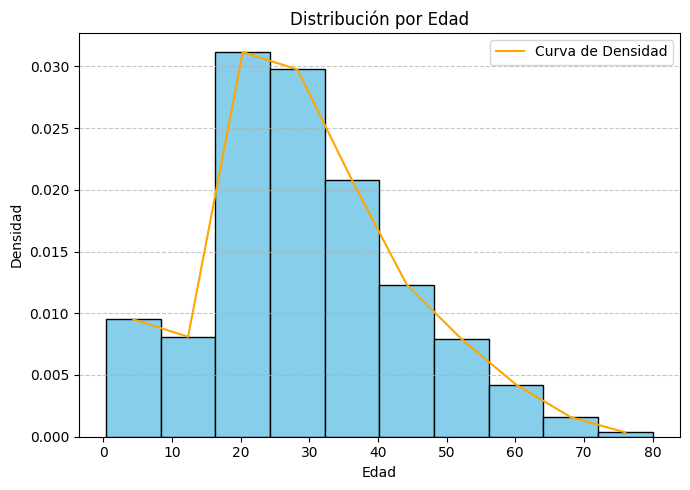

In [ ]:
age_data = df['Age']

plt.figure(figsize=(7, 5))
n, x, _ = plt.hist(age_data, density=True, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución por Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.plot(0.5 * (x[1:] + x[:-1]), n, color='orange', label='Curva de Densidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


In [ ]:
edad_ninos = int(df[df.Age < 16].Age.count())
edad_no_vulnerable = int(df[(df.Age >= 16) & (df.Age <= 40)].Age.count())
edad_adultos_mayores = int(df[df.Age > 40].Age.count())
registros_totales = int(df.Age.count())

print("Edades totales registradas:", registros_totales)
print("Personas entre los 16 y 40 (inclusivo):", edad_no_vulnerable, f"({int(100 * edad_no_vulnerable / registros_totales)}%)")
print("Personas menores a los 16:", edad_ninos, f"({int(100 * edad_ninos / registros_totales)}%)")
print("Personas mayores a los 40:", edad_adultos_mayores, f"({int(100 * edad_adultos_mayores / registros_totales)}%)")

Edades totales registradas: 714
Personas entre los 16 y 40 (inclusivo): 481 (67%)
Personas menores a los 16: 83 (11%)
Personas mayores a los 40: 150 (21%)


### 1.3.2 Distribución de tarifa pagada

Aunque la mayoria de las tarifas fueron entre los 6 a 65 dólares concentrado alrededor de los 6 a 10 dólares, algunas tarifas se salen por mucho de este rango, incluso llegando más allá de los 500 dólares. Esto significa que una Boxplot con los datos anómalos es prácticamente imposible de leer, pero eliminando estos datos, o mejor aún, usando un histograma logarítmico, podemos tener una mejor idea de las tarifas reales.

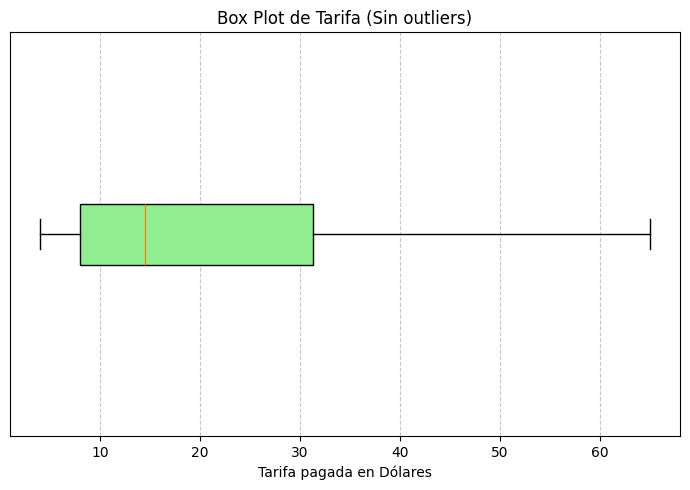

In [ ]:
fare_data = df['Fare'].dropna()
fare_data = fare_data[fare_data > 0]

plt.figure(figsize=(7, 5))
plt.boxplot(fare_data, orientation='horizontal', patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), showfliers=False )
plt.title('Box Plot de Tarifa (Sin outliers)')
plt.xlabel('Tarifa pagada en Dólares')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()

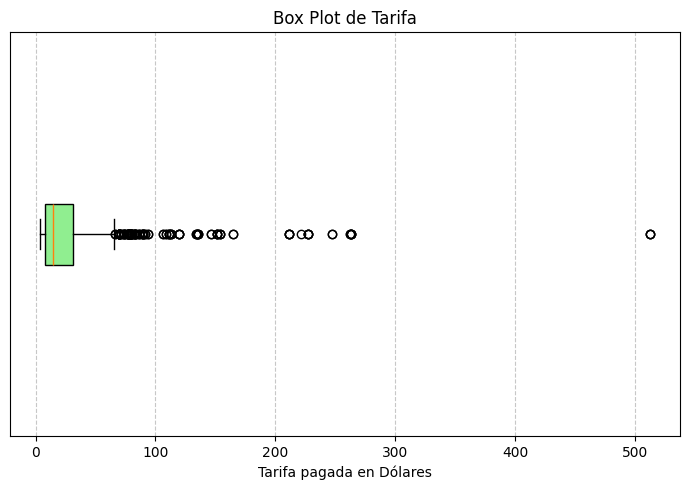

In [ ]:
fare_data = df['Fare'].dropna()
fare_data = fare_data[fare_data > 0]

plt.figure(figsize=(7, 5))
plt.boxplot(fare_data, orientation='horizontal', patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), showfliers=True )
plt.title('Box Plot de Tarifa')
plt.xlabel('Tarifa pagada en Dólares')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks([])
plt.tight_layout()

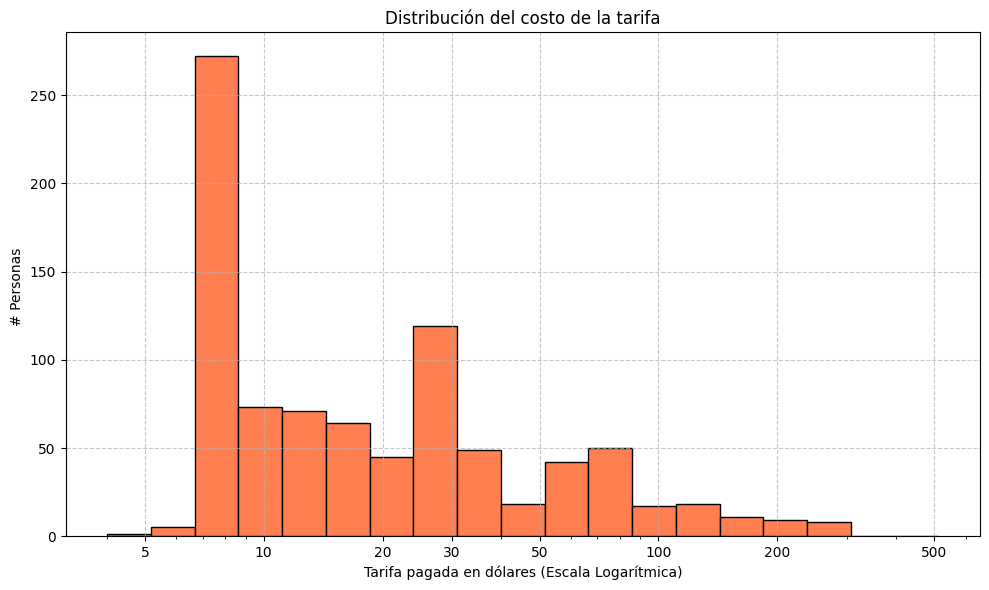

In [ ]:
fare_data = df['Fare'].dropna()

fare_data = fare_data[fare_data > 0]

plt.figure(figsize=(10, 6))

log_min = np.log10(fare_data.min())
log_max = np.log10(fare_data.max())

number_of_bins = 20
log_bins = np.logspace(log_min, log_max, number_of_bins)

plt.hist(fare_data, bins=log_bins, color='coral', edgecolor='black')

plt.xscale('log')

custom_ticks = [5, 10, 20, 30, 50, 100, 200, 500]
plt.xticks(custom_ticks, labels=[str(int(t)) for t in custom_ticks])

plt.title('Distribución del costo de la tarifa')
plt.xlabel('Tarifa pagada en dólares (Escala Logarítmica)')
plt.ylabel('# Personas ')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

### 1.3.3 Gráficos de barras para variables categóricas


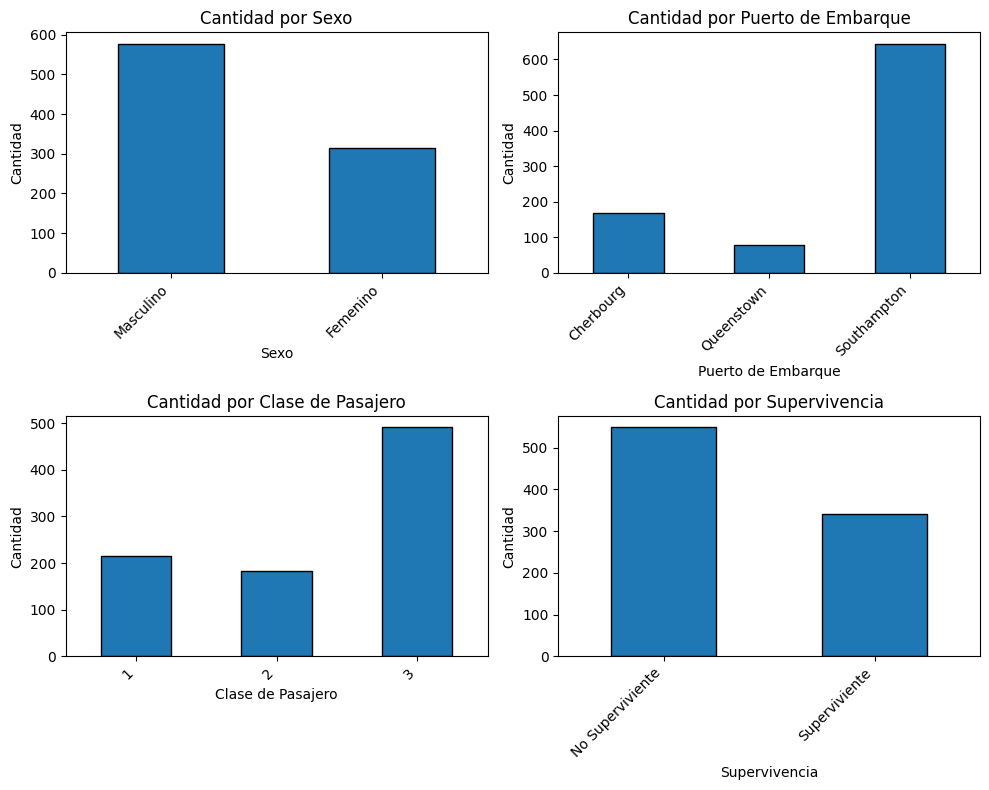

In [ ]:
categorical_columns = ['Sex', 'Embarked', 'Pclass', 'Survived']
category_orders = {
    'Sex': ['male', 'female'],
    'Embarked': ['C', 'Q', 'S'],
    'Pclass': [1, 2, 3],
    'Survived': [0, 1]
}

column_name_translation = {
    'Sex': 'Sexo',
    'Embarked': 'Puerto de Embarque',
    'Pclass': 'Clase de Pasajero',
    'Survived': 'Supervivencia'
}

tick_label_translation = {
    'male': 'Masculino',
    'female': 'Femenino',
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton',
    0: 'No Superviviente',
    1: 'Superviviente'
}


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, col in zip(axes.flatten(), categorical_columns):
    value_counts = df[col].value_counts(dropna=False)
    order = category_orders.get(col)

    if order is not None:
        value_counts = value_counts.reindex(order, fill_value=0) # fill_value=0 for absent categories

    value_counts.plot(kind='bar', ax=ax, edgecolor='black')

    translated_col_name = column_name_translation.get(col, col) # Get translation or use original
    ax.set_title(f'Cantidad por {translated_col_name}')
    ax.set_xlabel(translated_col_name)
    ax.set_ylabel('Cantidad')

    current_ticks = ax.get_xticks()
    current_labels = [item.get_text() for item in ax.get_xticklabels()]

    translated_labels = []
    for label in current_labels:
        try:
            numeric_label = int(label)
            if col != 'Pclass':
                translated_labels.append(tick_label_translation.get(numeric_label, label))
            else:
                translated_labels.append(label)
        except ValueError:
            translated_labels.append(tick_label_translation.get(label, label))

    ax.set_xticklabels(translated_labels, rotation=45, ha='right') # Rotate for better readability

plt.tight_layout()

## 1.4 Análisis Bivariado y Multivariado

### 1.4.1 Supervivencia por género y clase

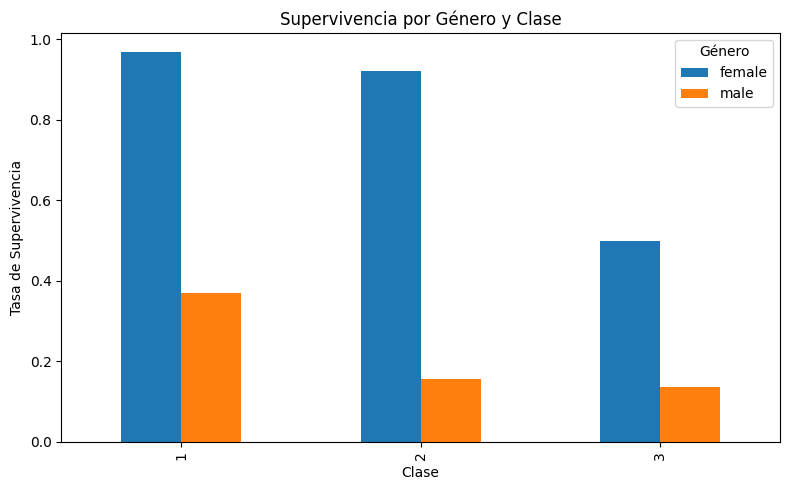

In [ ]:
survived_by_sex_class = df.pivot_table(
    index='Pclass', columns='Sex', values='Survived', aggfunc='mean'
)
survived_by_sex_class.plot(kind='bar', figsize=(8, 5))
plt.title('Supervivencia por Género y Clase')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Clase')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

Las mujeres a bordo del Titanic, representando solamente un tercio de los pasajeros en la muestra, tuvieron las mejores probabilidades de sobrevivir, pero empeorando esas posibilidades con peor clase de boleto.

Para las mujeres, la supervivencia fue:
* 96.8% de las mujeres de primera clase
* 92.1% de las mujeres de segunda clase
* 50% de las mujeres de tercera clase

Para los hombres:
* 36.9% para hombres de primera clase
* 15.7% para hombres de segunda clase
* 13.5% para hombres de tercera clase

### 1.4.2 Supervivencia por edad

/tmp/ipython-input-3623301268.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age = df.groupby('AgeGroup')['Survived'].mean()


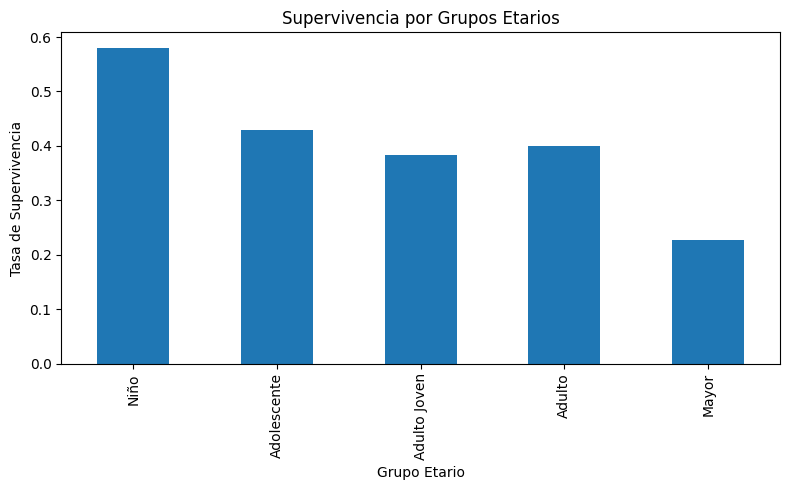

In [ ]:
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Niño', 'Adolescente', 'Adulto Joven', 'Adulto', 'Mayor']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
survived_by_age = df.groupby('AgeGroup')['Survived'].mean()
survived_by_age.plot(kind='bar', figsize=(8, 5))
plt.title('Supervivencia por Grupos de Edad')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Grupo Etario')
plt.tight_layout()
plt.show()

### 1.4.3 Matriz de correlación entre variables numéricas


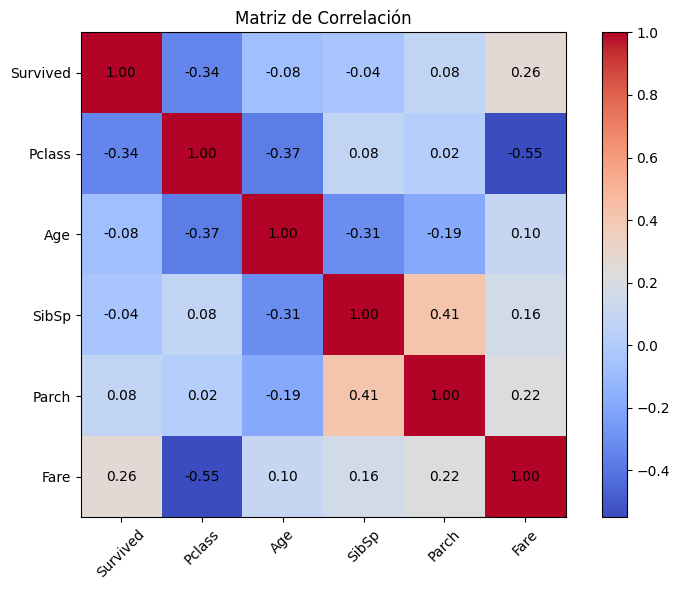

In [ ]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Matriz de Correlación')
for (i, j), val in np.ndenumerate(corr):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

### 1.4.4 Supervivencia por puerto de embarque

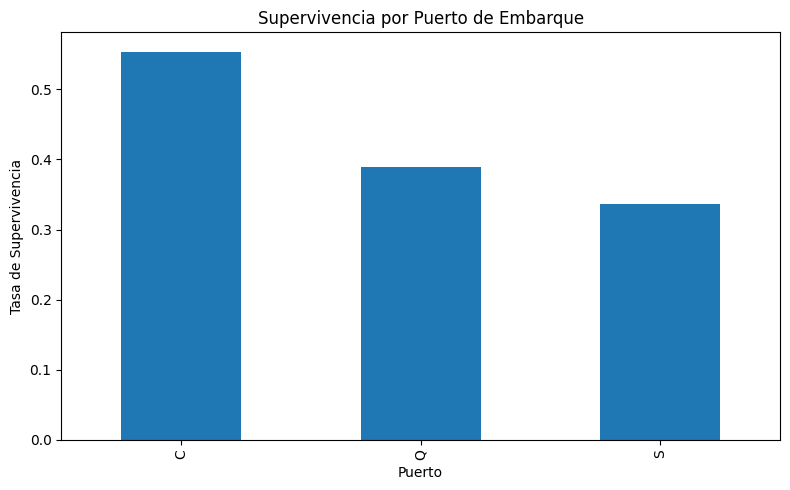

In [ ]:
survived_by_port = df.groupby('Embarked')['Survived'].mean()
survived_by_port.plot(kind='bar', figsize=(8, 5))
plt.title('Supervivencia por Puerto de Embarque')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Puerto')
plt.tight_layout()
plt.show()

### 1.4.5 Análisis de tarifa por clase


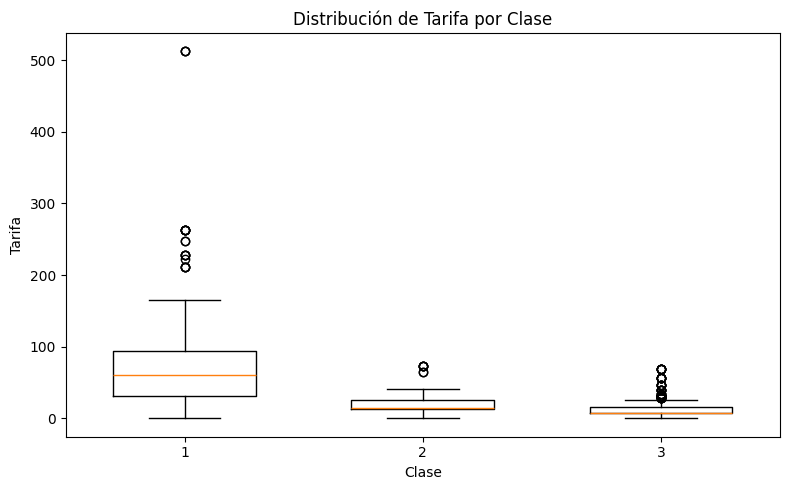

In [ ]:
plt.figure(figsize=(8, 5))
for pclass in sorted(df['Pclass'].unique()):
    fares = df[df['Pclass'] == pclass]['Fare']
    plt.boxplot(fares, positions=[pclass], widths=0.6)
plt.title('Distribución de Tarifa por Clase')
plt.ylabel('Tarifa')
plt.xlabel('Clase')
plt.xticks(sorted(df['Pclass'].unique()))
plt.tight_layout()
plt.show()

### 1.4.6 Supervivencia por tamaño de familia


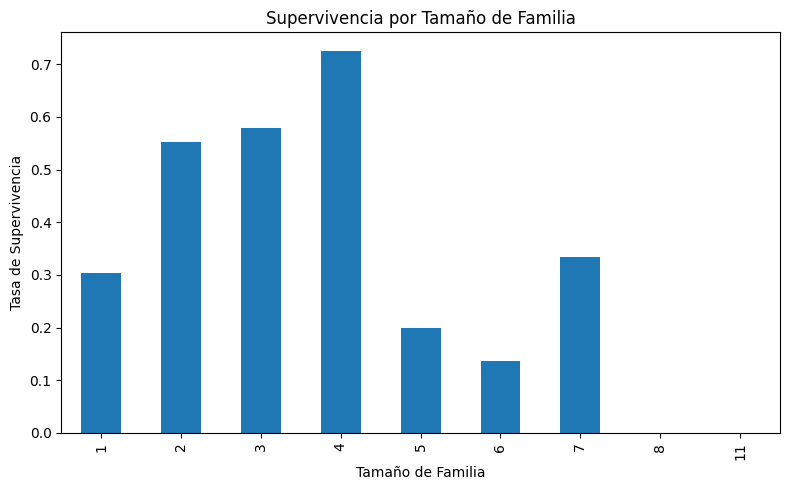

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
survived_by_family = df.groupby('FamilySize')['Survived'].mean()
survived_by_family.plot(kind='bar', figsize=(8, 5))
plt.title('Supervivencia por Tamaño de Familia')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Tamaño de Familia')
plt.tight_layout()
plt.show()

### 1.4.7 Gráficos de mosaico o heatmaps para relaciones categóricas


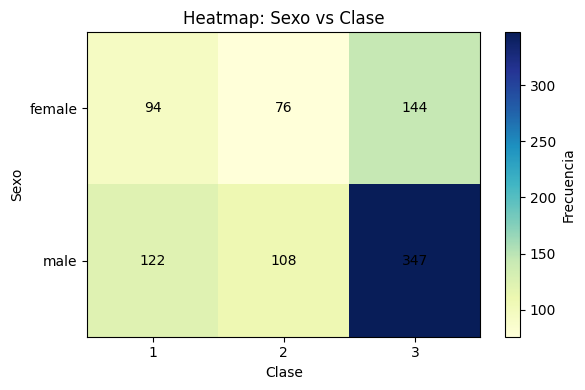

In [ ]:
cross_tab = pd.crosstab(df['Sex'], df['Pclass'])
plt.figure(figsize=(6, 4))
plt.imshow(cross_tab, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Frecuencia')
plt.xticks(range(len(cross_tab.columns)), cross_tab.columns)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)
plt.xlabel('Clase')
plt.ylabel('Sexo')
plt.title('Heatmap: Sexo vs Clase')
for i in range(cross_tab.shape[0]):
    for j in range(cross_tab.shape[1]):
        plt.text(j, i, cross_tab.iloc[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

### 1.4.8 Gráfico de Supervivencia por Subgrupo de Categorias de Tamaños de Familia



In [ ]:
# Estadísticas para revisar posibles combinaciones de factores que juegan un papel clave para los datos

df['TamañoFamilia'] = df['SibSp'] + df['Parch'] + 1  # Tamaño de la familia dentro del barco
df["OrigenClase3"] = (df['Pclass'] == 3).astype(int) # Creación de variable binaria para una mejor interpretación
df["OrigenEmbarked_Southampton"] = (df['Embarked'] == 'S').astype(int)

In [ ]:
subgrupo1 = (df["OrigenClase3"] == 1) & (df["OrigenEmbarked_Southampton"] == 1) # Creación del subgrupo que respeta las combinanciones anteriores
df['Categorias_Familia'] = pd.cut(df['TamañoFamilia'], bins=[0,1,3,6,100], labels=['1','2-3','4-6','7+']) # Categorías de familia con etiquetas
print("Total de Pasajeros de Tercera & Southampton por Familia :", df[subgrupo1].shape[0])
print("Distribución (Tercera Clase & Southampton por Tamaño de Familia):")
print(df[subgrupo1]['Categorias_Familia'].value_counts(dropna=False))

Total de Pasajeros de Tercera & Southampton por Familia : 353
Distribución (Tercera Clase & Southampton por Tamaño de Familia):
Categorias_Familia
1      232
2-3     67
4-6     29
7+      25
Name: count, dtype: int64


In [ ]:
df[subgrupo1].groupby('Categorias_Familia')['Survived'].agg(['count','mean']).rename(columns={'mean':'Supervivencia'})


/tmp/ipython-input-2412730589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[subgrupo1].groupby('Categorias_Familia')['Survived'].agg(['count','mean']).rename(columns={'mean':'Supervivencia'})


,count,Supervivencia
Categorias_Familia,,
1,232,0.168103
2-3,67,0.328358
4-6,29,0.068966
7+,25,0.160000


/tmp/ipython-input-3542318626.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_subgrupo1 = df[subgrupo1].groupby('Categorias_Familia')['Survived'].mean().reset_index()
/tmp/ipython-input-3542318626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate_subgrupo1, x='Categorias_Familia', y='Survived', palette='viridis')


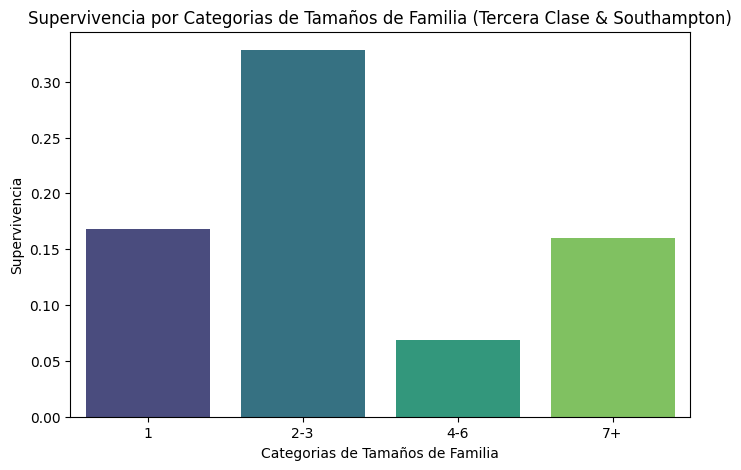

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se calcula la supervivencia por el subgrupo de categorias de tamaños de familia
survival_rate_subgrupo1 = df[subgrupo1].groupby('Categorias_Familia')['Survived'].mean().reset_index()

# Se crea un boxplot
plt.figure(figsize=(8, 5))
sns.barplot(data=survival_rate_subgrupo1, x='Categorias_Familia', y='Survived', palette='viridis')

# Add titles and labels
plt.title('Supervivencia por Categorias de Tamaños de Familia (Tercera Clase & Southampton)')
plt.xlabel('Categorias de Tamaños de Familia')
plt.ylabel('Supervivencia')

# Desplegar gráfica
plt.show()


### 1.4.9 Correlación Tarifa a # de empleados

In [ ]:
# Me funciona local, no se porque no me corre en Colab.

class1 = df[df.Pclass == 1]
class2 = df[df.Pclass == 2]
class3 = df[df.Pclass == 3]

class1['FamilySize'].corr(class1['Fare'])
class2['FamilySize'].corr(class2['Fare'])
class3['FamilySize'].corr(class3['Fare'])

KeyError: 'FamilySize'

## 1.5 Análisis de Valores Faltantes

### 1.5.1 Visualizar patrones de valores faltantes


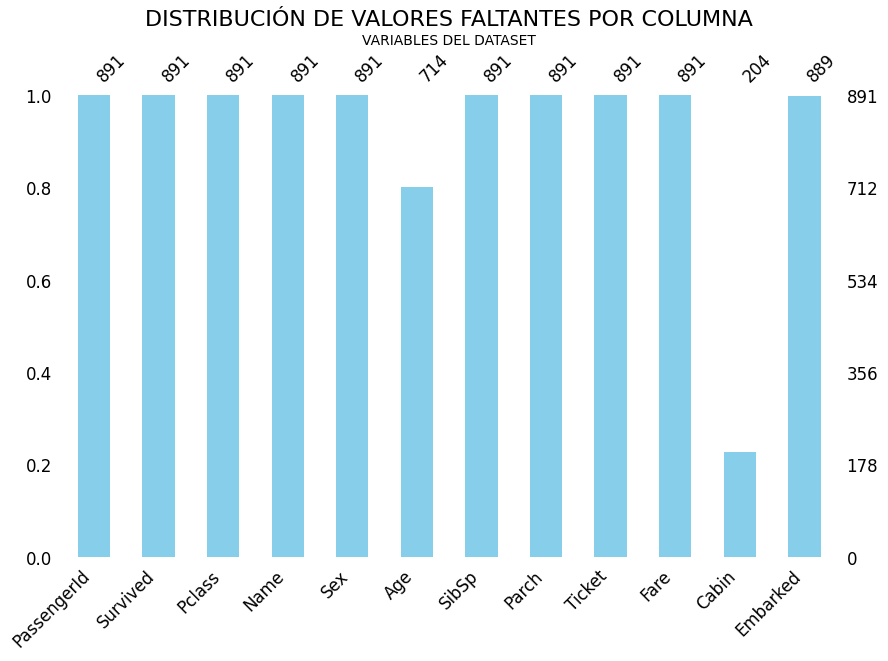

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Titanic-Dataset.csv')
msno.bar(df, figsize=(10,6), fontsize=12, color='skyblue')
plt.title('DISTRIBUCIÓN DE VALORES FALTANTES POR COLUMNA', fontsize=16)
plt.ylabel('CANTIDAD DE VALORES NO NULOS')
plt.xlabel('VARIABLES DEL DATASET')
plt.show()

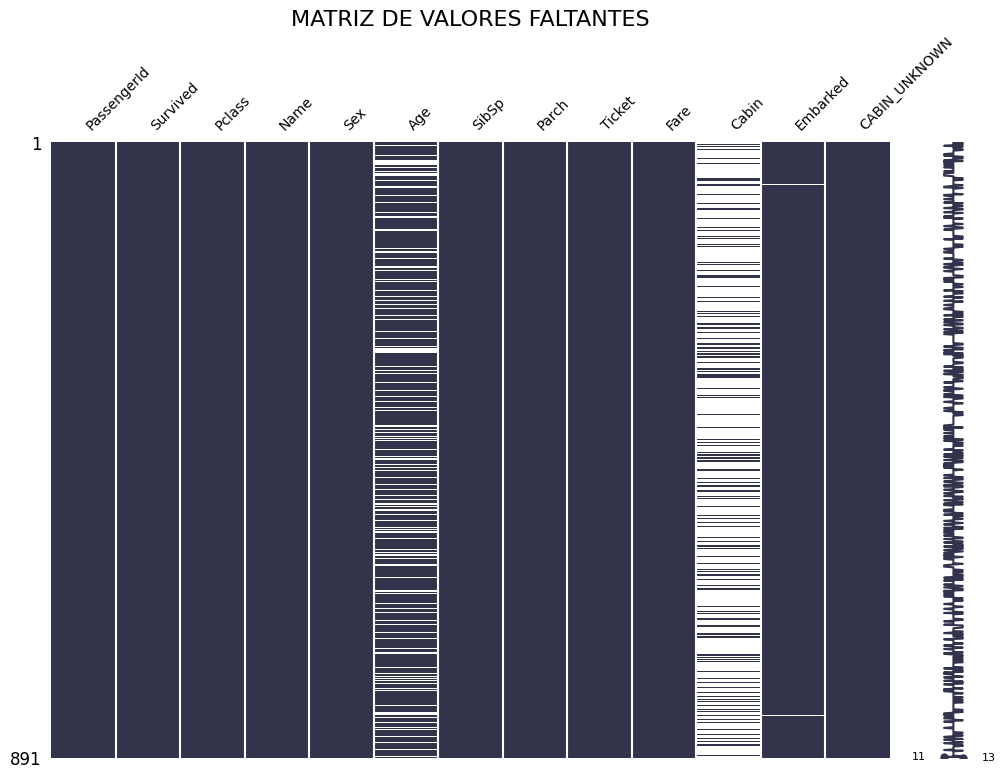

In [ ]:
# MATRIZ DE VALORES FALTANTES
msno.matrix(df, figsize=(12,8), fontsize=10, color=(0.2, 0.2, 0.3))
plt.title('MATRIZ DE VALORES FALTANTES', fontsize=16)
plt.show()

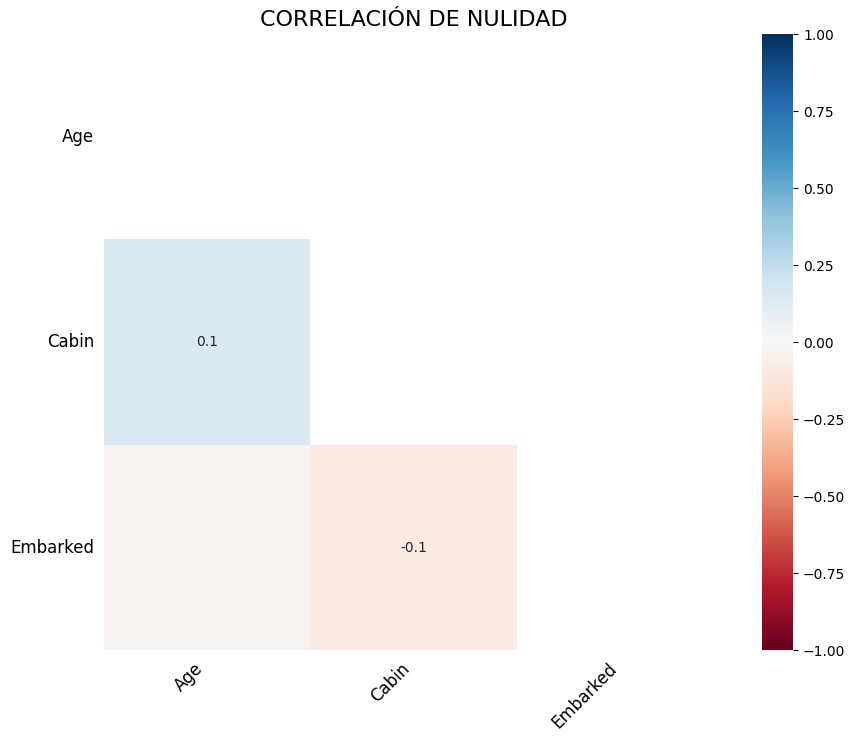

In [ ]:
# HEATMAP DE CORRELACIÓN DE NULIDAD
msno.heatmap(df, figsize=(10,8), fontsize=12)
plt.title('CORRELACIÓN DE NULIDAD', fontsize=16)
plt.show()

### 1.5.2 Analizar si los valores faltantes son aleatorios o sistemáticos

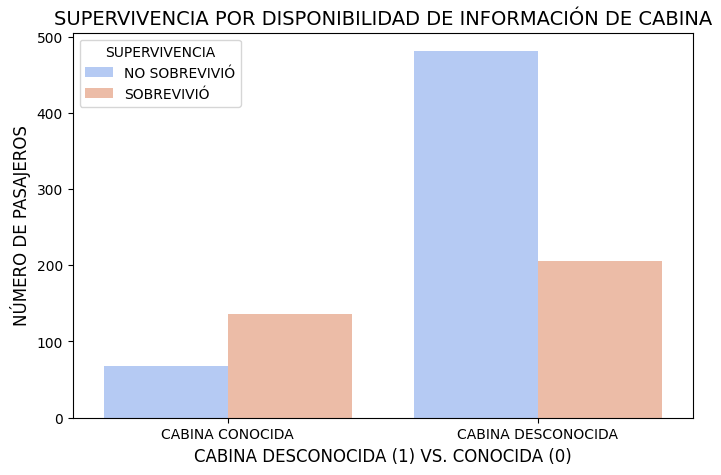

/tmp/ipython-input-3792073617.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




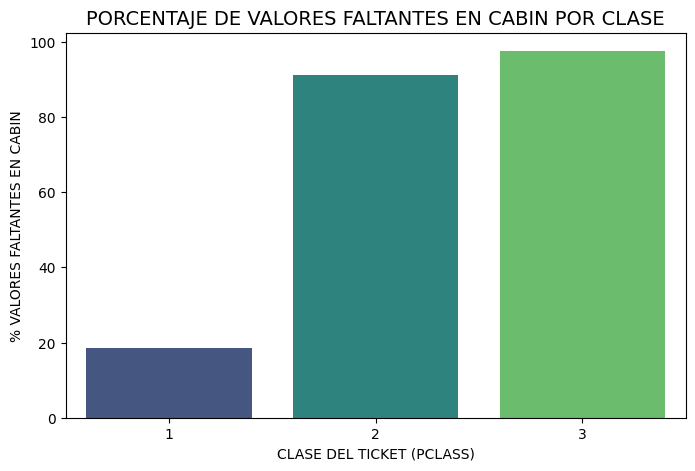

In [ ]:
df['CABIN_UNKNOWN'] = df['Cabin'].isnull().astype(int)

# VISUALIZACIÓN DE SUPERVIVENCIA POR CONOCIMIENTO DE CABINA
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CABIN_UNKNOWN', hue='Survived', palette='coolwarm')
plt.title('SUPERVIVENCIA POR DISPONIBILIDAD DE INFORMACIÓN DE CABINA', fontsize=14)
plt.xlabel('CABINA DESCONOCIDA (1) VS. CONOCIDA (0)', fontsize=12)
plt.ylabel('NÚMERO DE PASAJEROS', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['CABINA CONOCIDA', 'CABINA DESCONOCIDA'])
plt.legend(title='SUPERVIVENCIA', labels=['NO SOBREVIVIÓ', 'SOBREVIVIÓ'])
plt.show()

# ANÁLISIS: RELACIÓN ENTRE NULOS EN CABIN Y PCLASS
cabin_nan_by_pclass = df.groupby('Pclass')['Cabin'].apply(lambda x: x.isnull().sum() / len(x) * 100)
plt.figure(figsize=(8, 5))
sns.barplot(x=cabin_nan_by_pclass.index, y=cabin_nan_by_pclass.values, palette='viridis')
plt.title('PORCENTAJE DE VALORES FALTANTES EN CABIN POR CLASE', fontsize=14)
plt.xlabel('CLASE DEL TICKET (PCLASS)')
plt.ylabel('% VALORES FALTANTES EN CABIN')
plt.show()

# VISUALIZACIÓN INTERACTIVA CON PLOTLY
fig = px.scatter(df, x="Fare", y="Age", color="CABIN_UNKNOWN",
                 size="SibSp", hover_data=['Name', 'Survived', 'Pclass'],
                 title='RELACIÓN ENTRE TARIFA, EDAD Y VALORES FALTANTES EN CABINA',
                 labels={'CABIN_UNKNOWN': 'CABINA DESCONOCIDA'})
fig.show()

### 1.5.3 Proponer estrategias preliminares para su tratamiento


Basado en mi análisis exploratorio, propongo las siguientes estrategias para manejar los valores faltantes en las variables del dataset del titanic:

cabin: identifiqué que esta columna tiene más del 70% de valores faltantes. además, esta falta de datos no es aleatoria, sino que está sistemáticamente relacionada con la clase del pasajero, siendo las clases inferiores las que poseen más valores nulos. por esta razón, mi recomendación es eliminar la columna cabin por completo debido a su alta proporción de valores nulos. una estrategia alternativa es crear una nueva variable binaria (tiene_cabina) que indique si se conoce o no el valor, lo que podría ser relevante para mi análisis.

age: esta variable tiene un porcentaje moderado de valores faltantes (aproximadamente 20%). ya que la edad es un atributo crítico, no es viable eliminar la columna. propongo la estrategia de imputación, específicamente reemplazar los valores nulos con la mediana agrupada por la clase (pclass) y el género (sex). este enfoque me parece más robusto que usar una mediana global, ya que refleja mejor las diferencias demográficas entre los grupos sociales del barco.

embarked: esta variable categórica tiene solo dos valores faltantes. dado que es una cantidad insignificante en comparación con el tamaño total del dataset, propongo rellenar estos dos valores con el puerto de embarque más común (la moda), que según mi análisis exploratorio es southampton (s).